In [ ]:
import os
os._exit(00)

# $0-\pi$ Qubit 
In this notebook, we use Qcircuit to find the eigenVectors of the $0-\pi$ Qubit in the phase space based on the following paper:   
_Coherence properties of the 0-π qubit_  

First, we import the Qcircuit from circuitClass file and specify a number for each nodes on the circuit. The number for each node should be consecutive integer starts from zero(corresponds to circuit ground.) 

In [15]:
# Import circuitClass that contains Qcircuit
from circuitClass import *

<img src="pics/zeroPiQubit_pic1.png" width="200" />

We use Parameter Set 2 of the paper.(for PS 1, m around 150 needed) By the following cell, we find the correspondance capacitance, inductance, and JJ energies to those values.

<img src="pics/zeroPiQubit_pic2.png" width="650" />

In [71]:
### Parameter Set 1
# E_C = hbar*2*np.pi*0.02*GHz
# E_CJ = hbar*2*np.pi*20*GHz
# E_J = hbar*2*np.pi*10*GHz
# E_L = hbar*2*np.pi*0.008*GHz
# C = e**2/2/E_C
# C_J = e**2/2/E_CJ
# L = (Phi0/2/np.pi)**2/E_L

In [72]:
### Parameter Set 2
E_C = hbar*2*np.pi*0.04*GHz
E_CJ = hbar*2*np.pi*20*GHz
E_J = hbar*2*np.pi*10*GHz
E_L = hbar*2*np.pi*0.04*GHz
C = e**2/2/E_C
C_J = e**2/2/E_CJ
L = (Phi0/2/np.pi)**2/E_L

In [73]:
### Parameter Set 3
# E_C = hbar*2*np.pi*0.15*GHz
# E_CJ = hbar*2*np.pi*10*GHz
# E_J = hbar*2*np.pi*5*GHz
# E_L = hbar*2*np.pi*0.13*GHz
# C = e**2/2/E_C
# C_J = e**2/2/E_CJ
# L = (Phi0/2/np.pi)**2/E_L

We create the object of Qcircuit by initializing it with `circParam` dictionary.

In [74]:
# cicuitParam is a dictionary that contains the information about the graph structure,
# capacitor values, inductor values, and Josephson Junction Values.
# inductors should be in Henry
# capacitors should be in Farad
# JJ energies should be in Hz
circuitParam={'graph':[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]],
            'inductors':[None,L, None ,None,L,None],
            'capacitors':[C_J,0,C,C,0,C_J],
            'JJs':[E_J/(2*np.pi*hbar),None,None,None,None,E_J/(2*np.pi*hbar)]}

# cr is an object of Qcircuit
cr1 = Qcircuit(circuitParam)

By `cr1.setModeNumbers([m,m,m])`, we set the accuracy of the solver. For this circuit, Qcircuit converges with $m=25$. Next, we should call `cr1.configure()` to set up the equations needed to calculate the Hamiltonian.

In [75]:
m=62
# call this function to set the truncation number for each mode of the circuit. 
cr1.setModeNumbers([m,3,m])

# call this function to set up equations and preprocesses needed to calculate the Hamiltonian.
cr1.configure()

By applying `cr1.getExternalLinks()`, we find the inductive loops that we can apply external fluxes to them.

In [76]:
cr1.getExternalLinks()

[[0, 2, 3, 1]]

Qcircuit tells us that we can apply external fluxes to inductive loops created by the `[0,2,3,1]` cycle. Therefore, by calling `cr1.setExcitation([phiExt])`, we apply array of external fluxes to that specific loop.

In [77]:
# set external fluxes for each inductive loops of the circuit.
# phiExt = np.linspace(0,1,70)*2*np.pi
# cr1.setExcitation([phiExt])
cr1.setExcitation([2*np.pi*0])

By running the below cell, Qcircuit calculates the Hamiltonian and find the first 5 eigenvalues and eigenvectors of the system for each external fluxes.

In [78]:
# run the solver to calculate the eigenvalues and eigenvectors of the Hamiltonian for 
# specific number of bands
cr1.run(numBand = 4,showLoading=False)

The eigenValues are stored in the `cr1.HamilEigVal` variable in units of angular frequancy. The first index of the `cr1.HamilEigVal` refers to band number, and the second index refers to the index of external fluxes specified in `phiExt`. Therefore, the next cell plots the spectrum of the circuit.

In [79]:
# plt.figure()
# for i in range(4):
#     plt.plot(phiExt/2/np.pi,(cr1.HamilEigVal[i,:]-cr1.HamilEigVal[0,:]).real/GHz/2/np.pi)

# plt.xlabel("$\Phi_{ext}/\Phi_0$")
# plt.ylabel("GHz")
# plt.title('PS2 Spectrum')
# plt.savefig('ps2Spectrum.pdf')

The Following Code is how we use the Qcircuit to plot the eigenstates in phase space.

In [80]:
scale1 = 4e-13
phi_1 = 2*np.pi*np.linspace(-1,1,100)*scale1/2
phi_2 = 0
phi_3 = np.pi*np.linspace(-0.3,1.3,100)
Phi_1 , Phi_2, Phi_3 = np.meshgrid(phi_1,phi_2,phi_3)

Text(0.5, 1.0, 'Ground State at $\\varphi_{ext} = 0$')

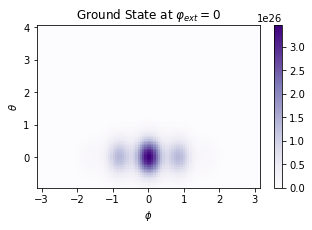

In [81]:
state1  = np.squeeze(cr1.eigVecPhaseSpace(0,[Phi_1 , Phi_2, Phi_3]))
plt.figure(figsize=(5, 3))
plt.pcolor(np.squeeze(Phi_1)/scale1,np.squeeze(Phi_3),np.abs(state1),cmap="Purples")
plt.colorbar()
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')
plt.title(r'Ground State at $\varphi_{ext} = 0$')

Text(0.5, 1.0, '1st excited state at $\\varphi_{ext} = 0$')

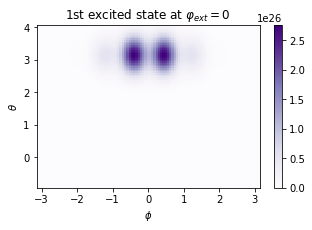

In [82]:
state2  = np.squeeze(cr1.eigVecPhaseSpace(1,[Phi_1 , Phi_2, Phi_3]))
plt.figure(figsize=(5, 3))
plt.pcolor(np.squeeze(Phi_1)/scale1,np.squeeze(Phi_3),np.abs(state2),cmap="Purples")
plt.colorbar()
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')
plt.title(r'1st excited state at $\varphi_{ext} = 0$')

In [85]:
scale1 = 4e-13
phi_1 = 2*np.pi*np.linspace(-1,1,100)*scale1/2
phi_2 = 0
phi_3 = 3.14
Phi_1 , Phi_2, Phi_3 = np.meshgrid(phi_1,phi_2,phi_3)

Text(0.5, 0, '$\\phi$')

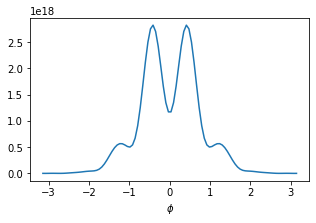

In [86]:
state1  = np.squeeze(cr1.eigVecPhaseSpace(0,[Phi_1 , Phi_2, Phi_3]))
plt.figure(figsize=(5, 3))
plt.plot(np.squeeze(Phi_1)/scale1,np.abs(state1))
plt.xlabel(r'$\phi$')
# plt.ylabel(r'$\theta$')
# plt.title(r'Ground State at $\varphi_{ext} = \pi$')